In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:01<00:00, 105MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 64% 104M/163M [00:00<00:00, 1.07GB/s]
100% 163M/163M [00:00<00:00, 661MB/s] 


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1119.jpg', 'with_mask_769.jpg', 'with_mask_2087.jpg', 'with_mask_207.jpg', 'with_mask_3673.jpg']
['with_mask_3543.jpg', 'with_mask_1864.jpg', 'with_mask_2383.jpg', 'with_mask_803.jpg', 'with_mask_6.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1465.jpg', 'without_mask_3032.jpg', 'without_mask_2194.jpg', 'without_mask_3242.jpg', 'without_mask_2639.jpg']
['without_mask_2080.jpg', 'without_mask_1701.jpg', 'without_mask_556.jpg', 'without_mask_3305.jpg', 'without_mask_1363.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


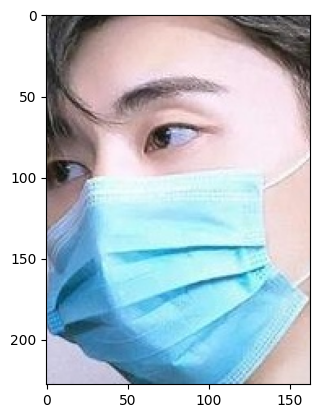

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

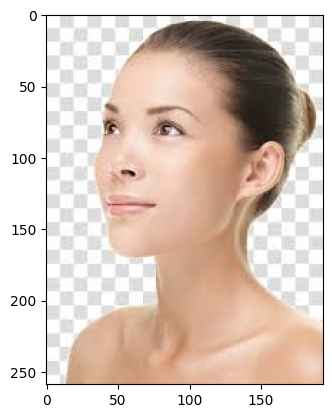

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 13,   8,   4],
        [ 13,   7,   3],
        [ 13,   5,   2],
        ...,
        [ 45,  40,  36],
        [ 45,  40,  34],
        [ 44,  39,  33]],

       [[ 19,  11,   8],
        [ 19,  11,   7],
        [ 19,  12,   6],
        ...,
        [ 49,  44,  39],
        [ 56,  51,  46],
        [ 59,  55,  49]],

       [[ 15,   6,   1],
        [ 17,   7,   3],
        [ 20,   9,   5],
        ...,
        [ 50,  42,  39],
        [ 59,  52,  47],
        [ 64,  57,  51]],

       ...,

       [[228, 226, 227],
        [207, 205, 206],
        [172, 170, 171],
        ...,
        [155, 125, 137],
        [154, 126, 136],
        [153, 126, 135]],

       [[228, 228, 230],
        [207, 207, 209],
        [172, 172, 174],
        ...,
        [155, 125, 137],
        [158, 130, 140],
        [159, 133, 141]],

       [[228, 228, 230],
        [207, 207, 209],
        [173, 173, 175],
        ...,
        [162, 132, 142],
        [168, 140, 149],
        [171, 144, 153]]], dtype=uint8)
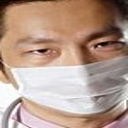

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 251],
        [254, 254, 251],
        [233, 235, 232],
        ...,
        [212, 225, 234],
        [213, 226, 235],
        [214, 227, 236]],

       [[255, 253, 249],
        [250, 250, 247],
        [243, 243, 242],
        ...,
        [212, 225, 234],
        [213, 226, 235],
        [214, 227, 236]],

       [[255, 254, 251],
        [232, 232, 229],
        [236, 236, 235],
        ...,
        [212, 225, 234],
        [213, 226, 235],
        [214, 227, 236]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
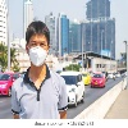

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 0.98431373],
        [0.99607843, 0.99607843, 0.98431373],
        [0.91372549, 0.92156863, 0.90980392],
        ...,
        [0.83137255, 0.88235294, 0.91764706],
        [0.83529412, 0.88627451, 0.92156863],
        [0.83921569, 0.89019608, 0.9254902 ]],

       [[1.        , 0.99215686, 0.97647059],
        [0.98039216, 0.98039216, 0.96862745],
        [0.95294118, 0.95294118, 0.94901961],
        ...,
        [0.83137255, 0.88235294, 0.91764706],
        [0.83529412, 0.88627451, 0.92156863],
        [0.83921569, 0.89019608, 0.9254902 ]],

       [[1.        , 0.99607843, 0.98431373],
        [0.90980392, 0.90980392, 0.89803922],
        [0.9254902 , 0.9254902 , 0.92156863],
        ...,
        [0.83137255, 0.88235294, 0.91764706],
        [0.83529412, 0.88627451, 0.92156863],
        [0.83921569, 0.89019608, 0.9254902 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
model.save('mask_detector.keras')

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.6983 - loss: 0.7336 - val_acc: 0.8810 - val_loss: 0.2806
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8865 - loss: 0.2890 - val_acc: 0.8909 - val_loss: 0.2558
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9154 - loss: 0.2279 - val_acc: 0.9008 - val_loss: 0.2404
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9250 - loss: 0.1985 - val_acc: 0.8942 - val_loss: 0.2510
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9369 - loss: 0.1561 - val_acc: 0.9124 - val_loss: 0.2127


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9063 - loss: 0.2518
Test Accuracy = 0.9166114926338196


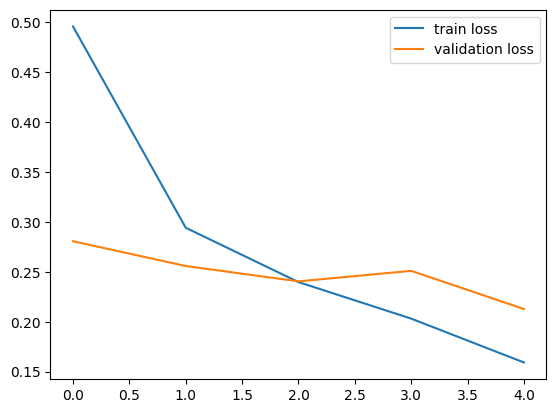

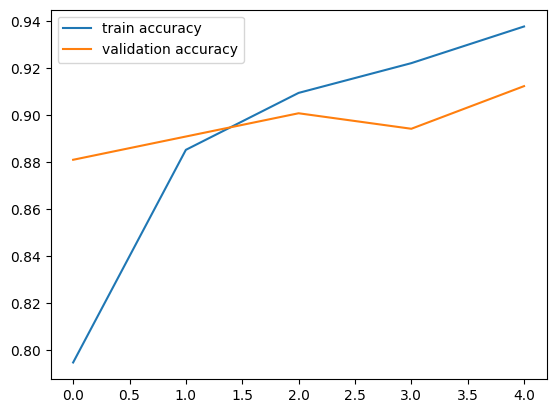

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/young-man-wearing-black-face-260nw-1696092880.webp


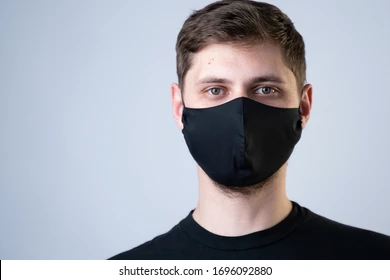

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
[[0.01043195 0.9964251 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
  print(f"Error: Could not load image from {input_image_path}. Please check the file path and format.")
else:
  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)


  if input_pred_label == 1:

    print('The person in the image is wearing a mask')

  else:

    print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/download (2).jpeg


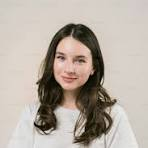

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw Prediction Output: [[0.14694078 0.9351751 ]]
Prediction Shape: (1, 2)
⚠️ Not wearing a mask (Confidence: 0.94)


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
  print(f"Error: Could not load image from {input_image_path}. Please check the file path and format.")
else:
  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)
print("Raw Prediction Output:", input_prediction)
print("Prediction Shape:", input_prediction.shape)

# Fix logic based on output shape
if input_prediction.shape[1] == 1:
    # Binary classification using sigmoid (output: [[0.85]])
    prob = input_prediction[0][0]
    if prob >= 0.5:
        print(f'✅ Wearing a mask (Confidence: {prob:.2f})')
    else:
        print(f'⚠️ Not wearing a mask (Confidence: {1 - prob:.2f})')
elif input_prediction.shape[1] == 2:
    # Categorical classification using softmax (output: [[0.8, 0.2]])
    label = np.argmax(input_prediction)

    # Reverse label if needed
    corrected_label = 1 - label  # TEMPORARY FIX if labels are flipped

    confidence = input_prediction[0][label]

    if corrected_label == 1:
        print(f'✅ Wearing a mask (Confidence: {confidence:.2f})')
    else:
        print(f'⚠️ Not wearing a mask (Confidence: {confidence:.2f})')